# 라이브러리 로딩

In [1]:
import numpy as np # Numpy
import pandas as pd # Pandas
import matplotlib as mpl #Matplotlib 세팅용
import matplotlib.pyplot as plt # 시각화 도구
import seaborn as sns # 시각화 도구
from sklearn.model_selection import train_test_split # 데이터셋 분리
from sklearn.model_selection import KFold # KFold 교차검증
from sklearn.cluster import KMeans # 클러스터링
from sklearn.metrics import silhouette_score # 실루엣 점수
import xgboost as xgb # XGBoost
from sklearn.model_selection import GridSearchCV # 그리드 서치
from sklearn.metrics import accuracy_score, precision_score # 평가 지표
from sklearn.metrics import recall_score, confusion_matrix, roc_auc_score, f1_score # 평가 지표
from imblearn.combine import SMOTEENN, SMOTETomek # 복합샘플링
from hyperopt import hp, fmin, tpe, Trials # HyperOPT

import warnings # 경고문 제거용


%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='D2Coding')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

warnings.filterwarnings('ignore')
sns.set(font="D2Coding", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=(10,8))

# 데이터 불러오기

In [2]:
data = pd.read_excel('train_test_na_filled.xlsx', sheet_name='Train')

# 시각화를 위한 전처리

In [3]:
data['Cabin2']=data.Cabin2.astype('object')

# 데이터 시각화

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8693 non-null   object
 2   CryoSleep     8693 non-null   bool  
 3   Cabin1        8590 non-null   object
 4   Cabin2        8590 non-null   object
 5   Combi         8590 non-null   object
 6   Cabin3        8590 non-null   object
 7   Cabin         8590 non-null   object
 8   Destination   8693 non-null   object
 9   Age           8693 non-null   int64 
 10  VIP           8693 non-null   bool  
 11  RoomService   8693 non-null   int64 
 12  FoodCourt     8693 non-null   int64 
 13  ShoppingMall  8693 non-null   int64 
 14  Spa           8693 non-null   int64 
 15  VRDeck        8693 non-null   int64 
 16  Name          8493 non-null   object
 17  Transported   8693 non-null   bool  
dtypes: bool(3), int64(6), object(9)
memory usage: 1.

In [5]:
data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin1          103
Cabin2          103
Combi           103
Cabin3          103
Cabin           103
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [6]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

findfont: Font family ['D2Coding'] not found. Falling back to DejaVu Sans.
findfont: Font family ['D2Coding'] not found. Falling back to DejaVu Sans.


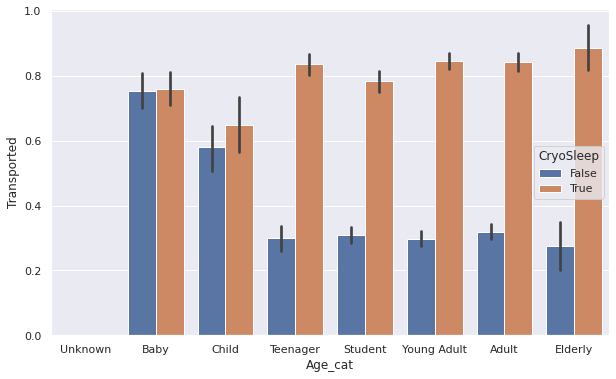

In [7]:
plt. figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
data['Age_cat'] = data['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Transported', hue='CryoSleep', data=data, order=group_names)
data.drop('Age_cat', axis=1, inplace=True)

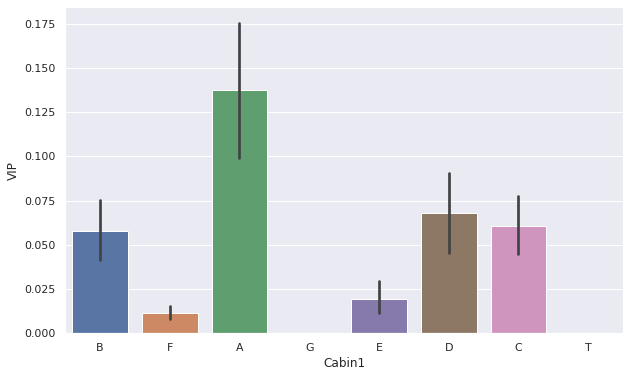

In [8]:
plt. figure(figsize=(10, 6))

sns.barplot(x='Cabin1', y='VIP', data=data)
plt.show()

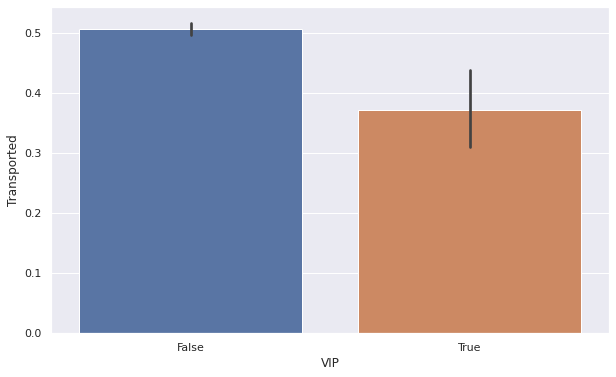

In [9]:
plt. figure(figsize=(10, 6))

sns.barplot(x='VIP', y='Transported', data=data)
plt.show()

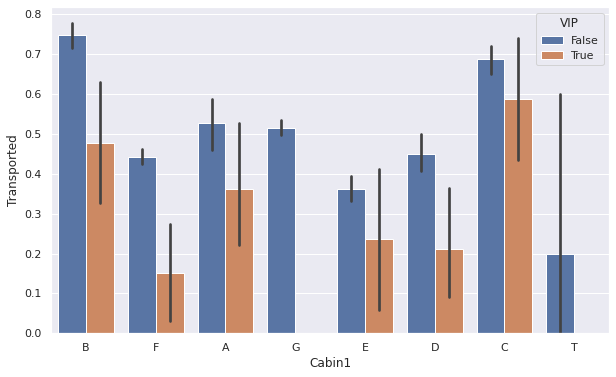

In [10]:
plt. figure(figsize=(10, 6))

sns.barplot(x='Cabin1', y='Transported', hue='VIP', data=data)
plt.show()

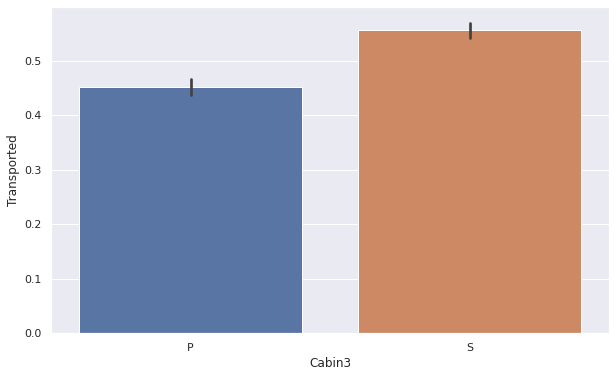

In [11]:
plt. figure(figsize=(10, 6))

sns.barplot(x='Cabin3', y='Transported', data=data)
plt.show()

In [12]:
data.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Shape of your Data Set loaded: (8693, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
PassengerId,8693,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
Name,8473,object,200,2.300702,97.469228,1,"combine rare categories, fill missing, fix mixed data types"
Cabin,6560,object,103,1.184861,75.463016,1,"combine rare categories, fill missing, fix mixed data types"
Combi,4453,object,103,1.184861,51.225124,1,"combine rare categories, fill missing, fix mixed data types"
Cabin2,1817,object,103,1.184861,20.901875,1,"combine rare categories, fill missing"
FoodCourt,1507,int64,0,0.000000,17.335787,0,
Spa,1327,int64,0,0.000000,15.265156,0,
VRDeck,1306,int64,0,0.000000,15.023582,0,
RoomService,1273,int64,0,0.000000,14.643966,0,
ShoppingMall,1115,int64,0,0.000000,12.826412,0,


  Printing upto 30 columns max in each category:
    Numeric Columns : []
    Integer-Categorical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    String-Categorical Columns: ['HomePlanet', 'Cabin1', 'Destination', 'Name']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['CryoSleep', 'Cabin3', 'VIP']
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: ['Cabin2', 'Combi', 'Cabin']
    Date Time Columns: []
    ID Columns: ['PassengerId']
    Columns that will not be considered in modeling: []
    17 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['PassengerId']

################ Binary_Classification problem #####################
   Columns to delete:
'   []'
   Boolean variables %s 
"   ['CryoSleep', 'Cabin3', 'VIP']"
   Categorical variables %s 
("   ['HomePlanet', 'Cabin1', 'Destination', 'Name', 'CryoSleep', 'Cabin

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Could not draw some Pivot Charts against Dependent Variable


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nlt

Could not draw wordcloud plot for Cabin2


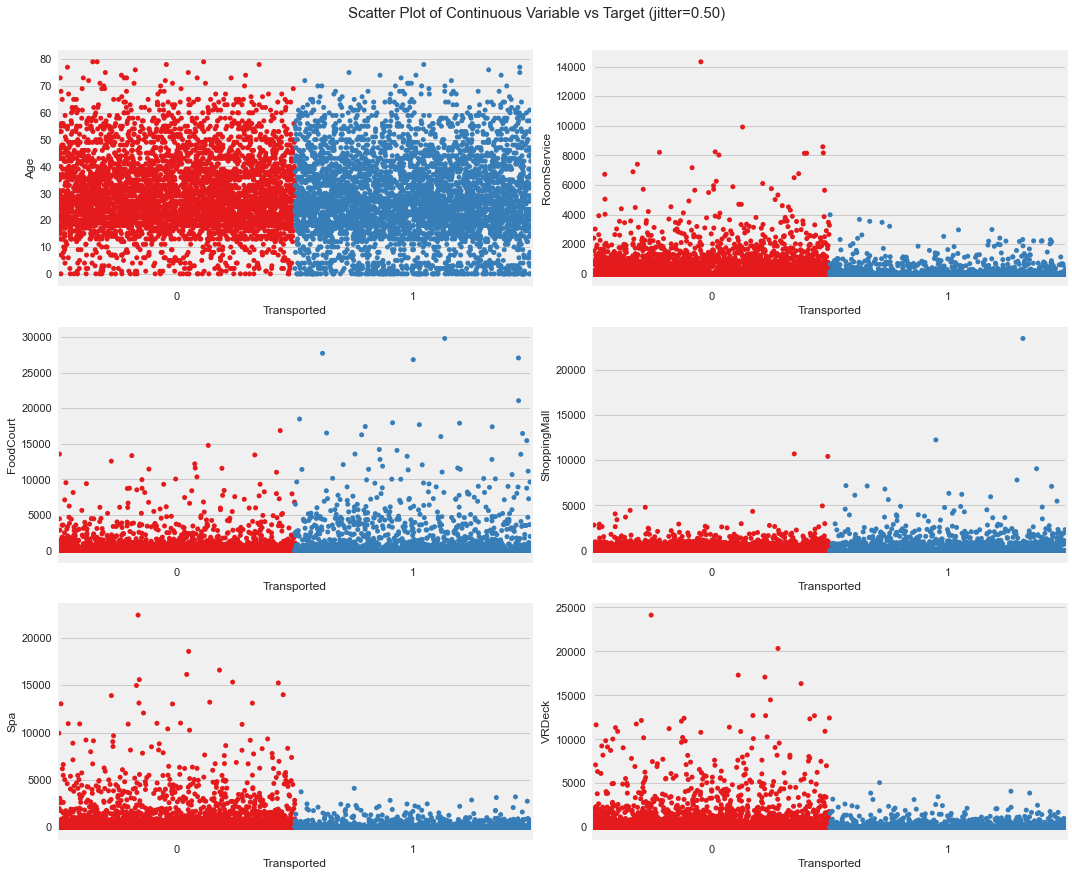

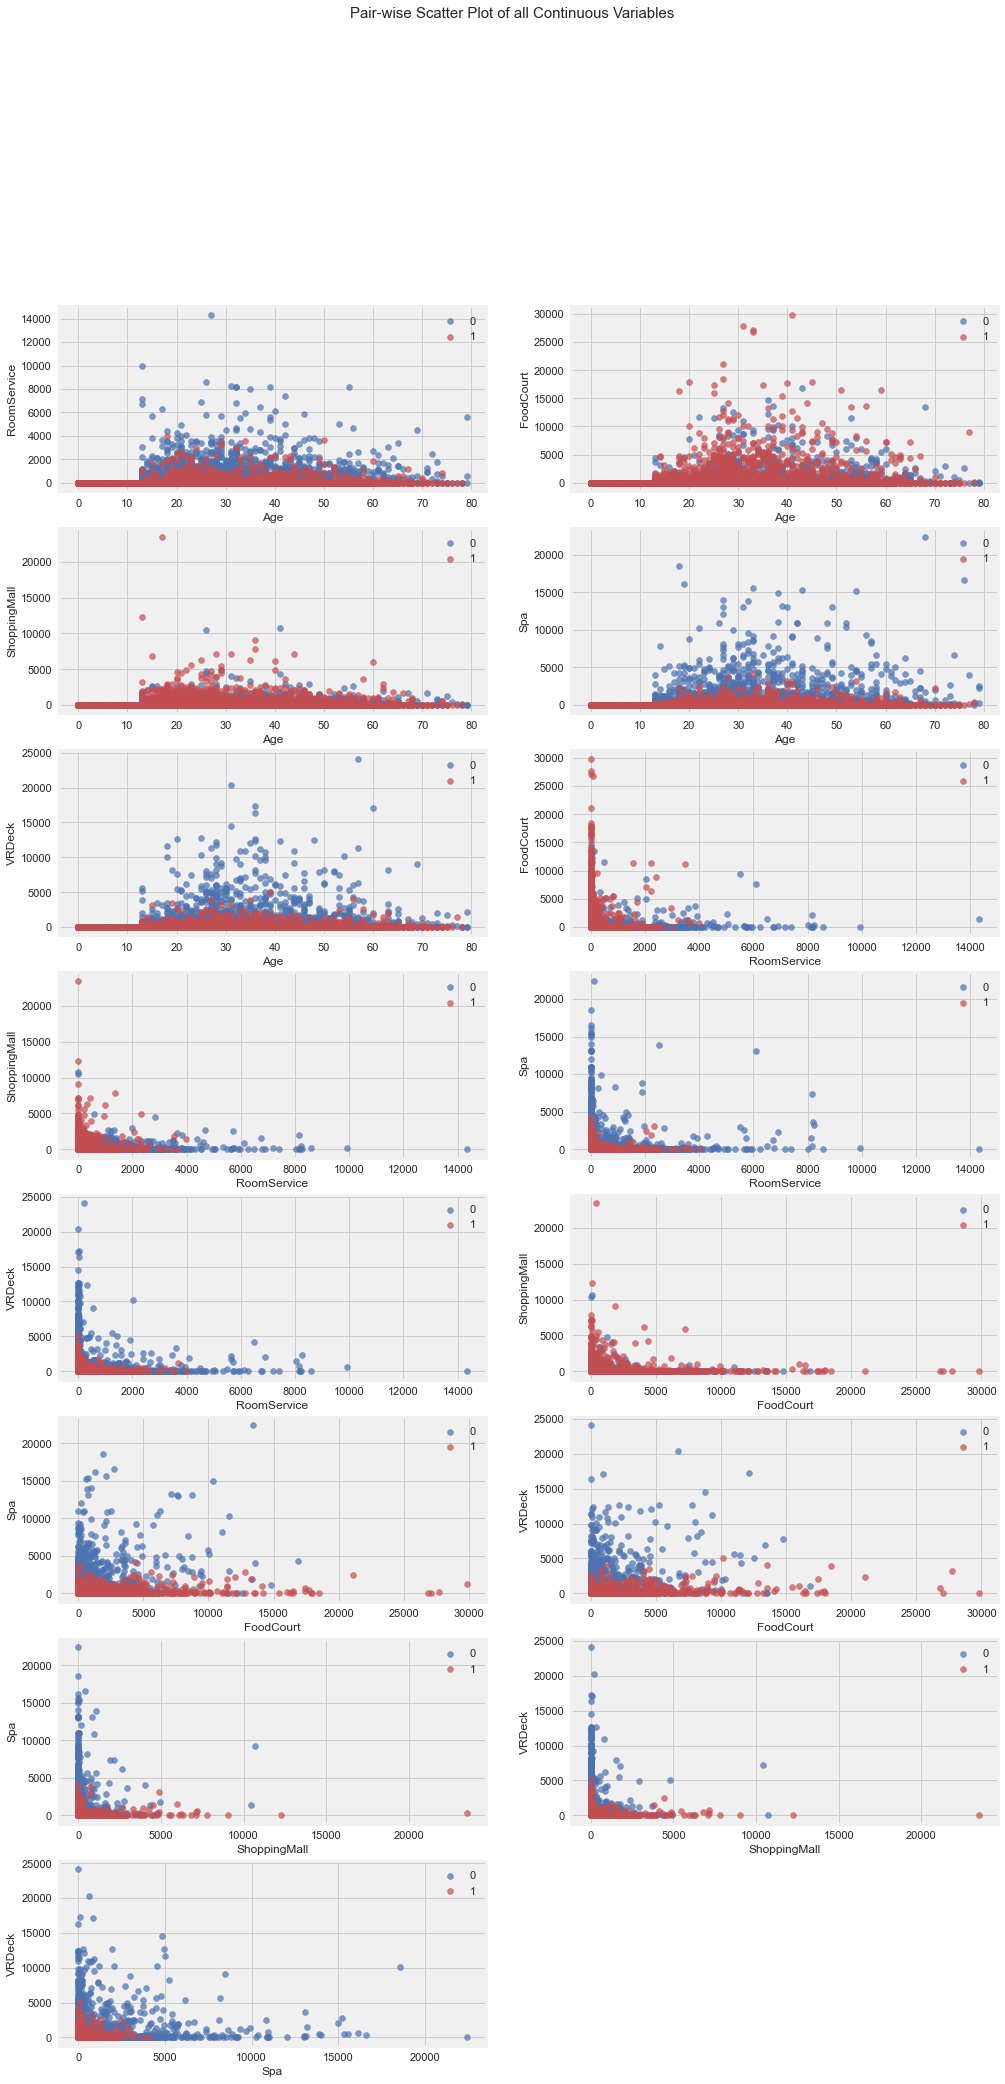

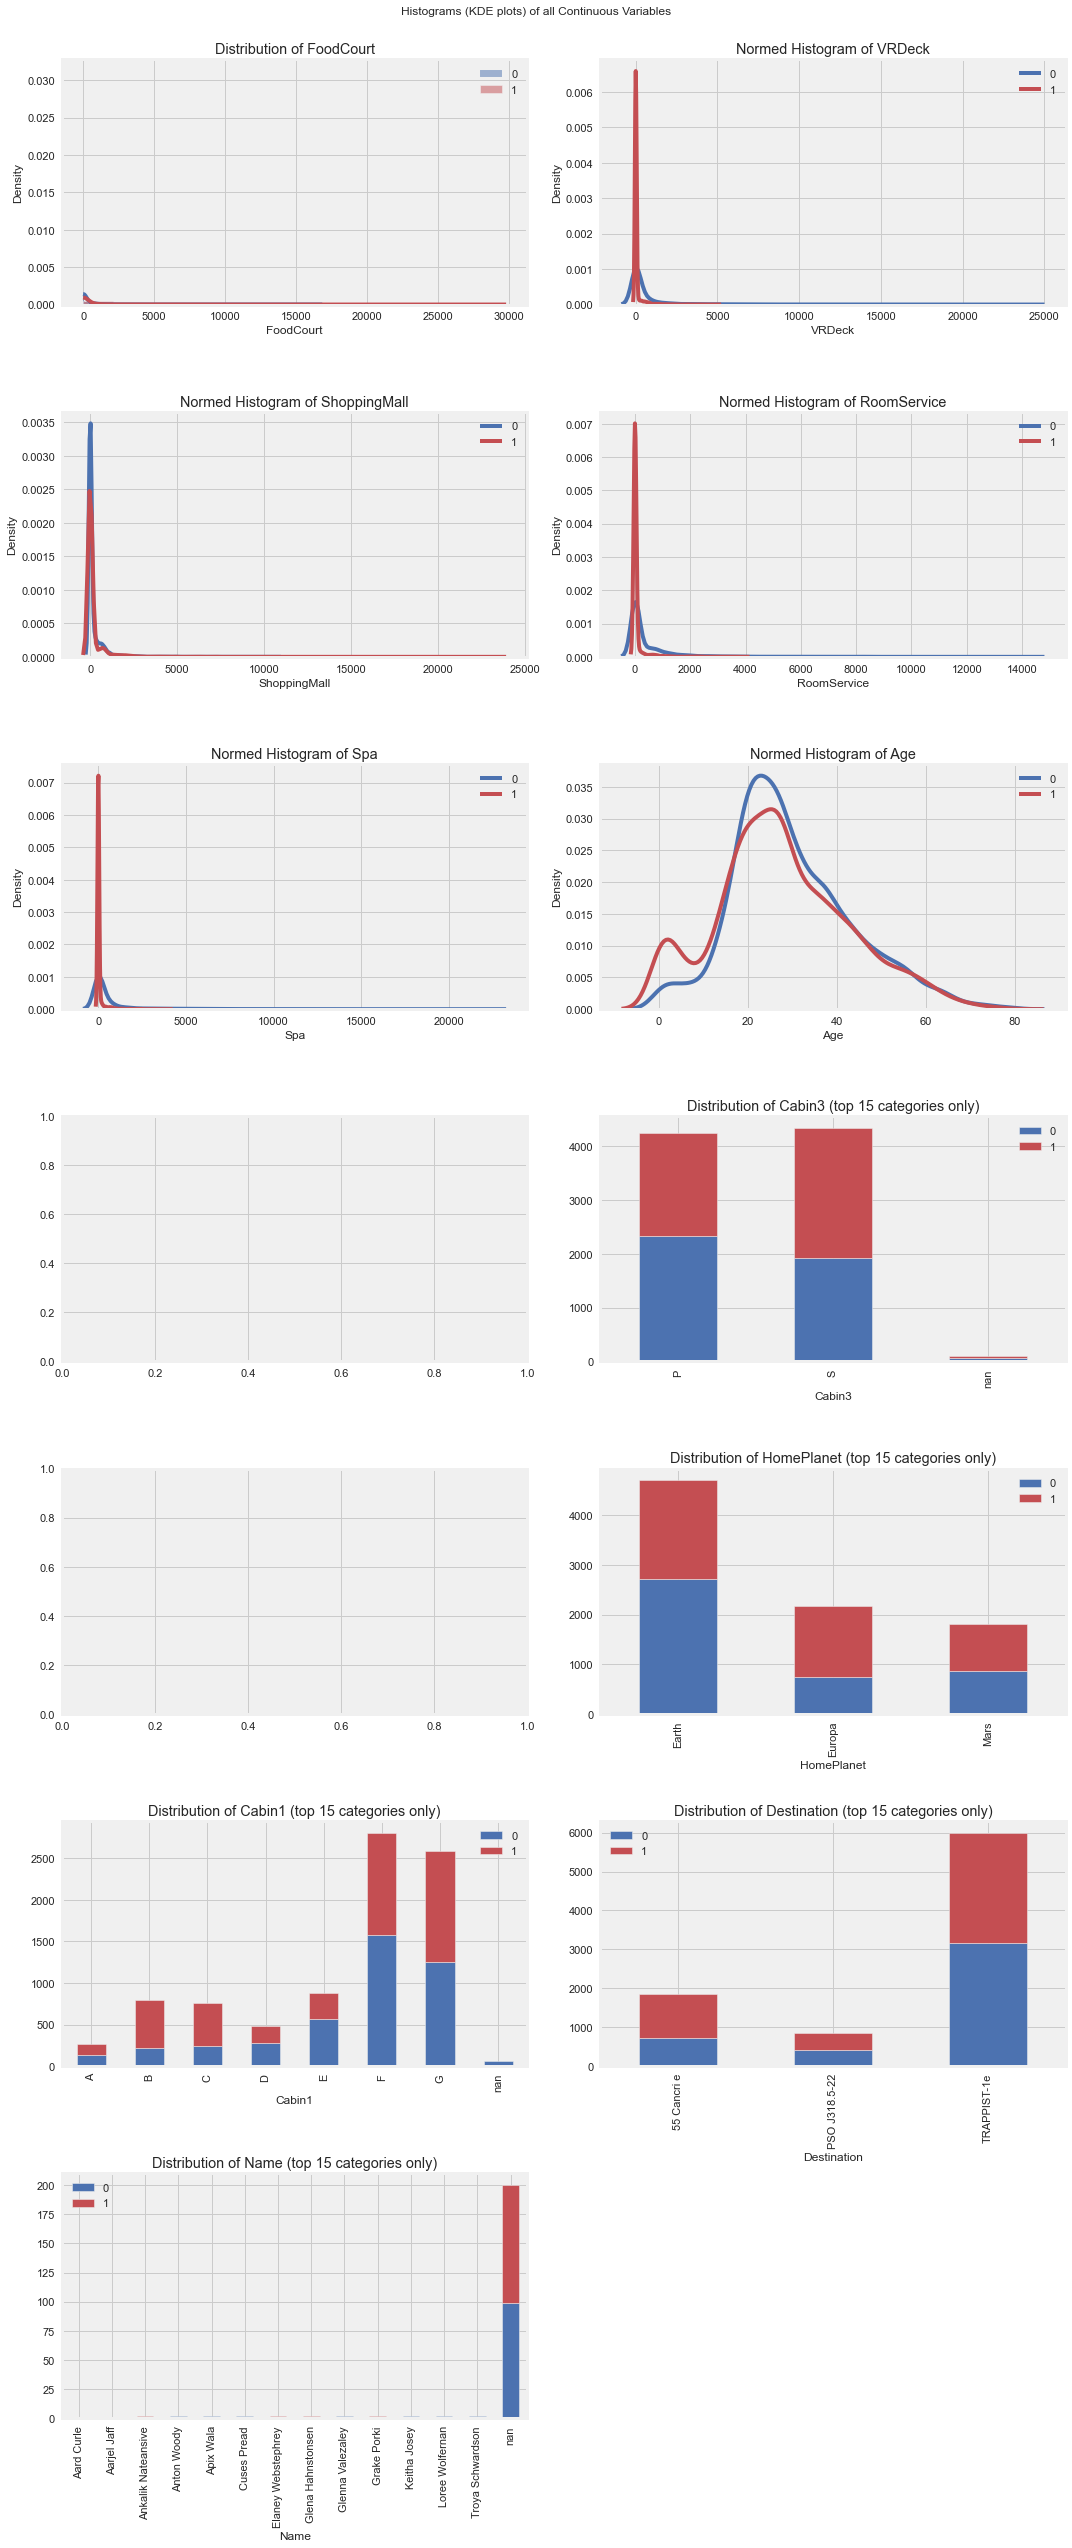

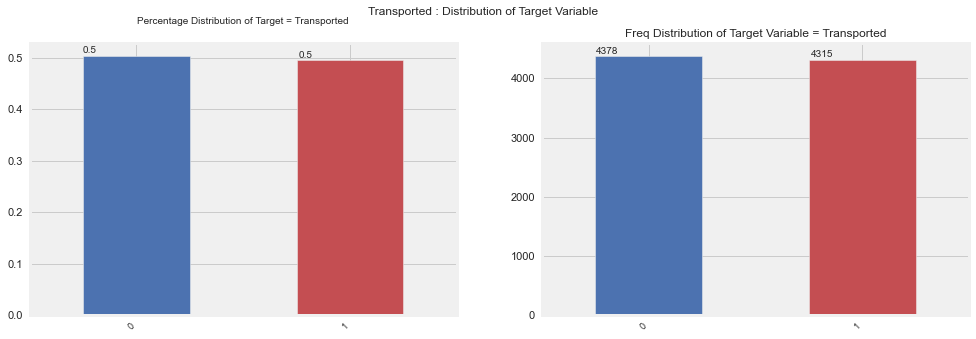

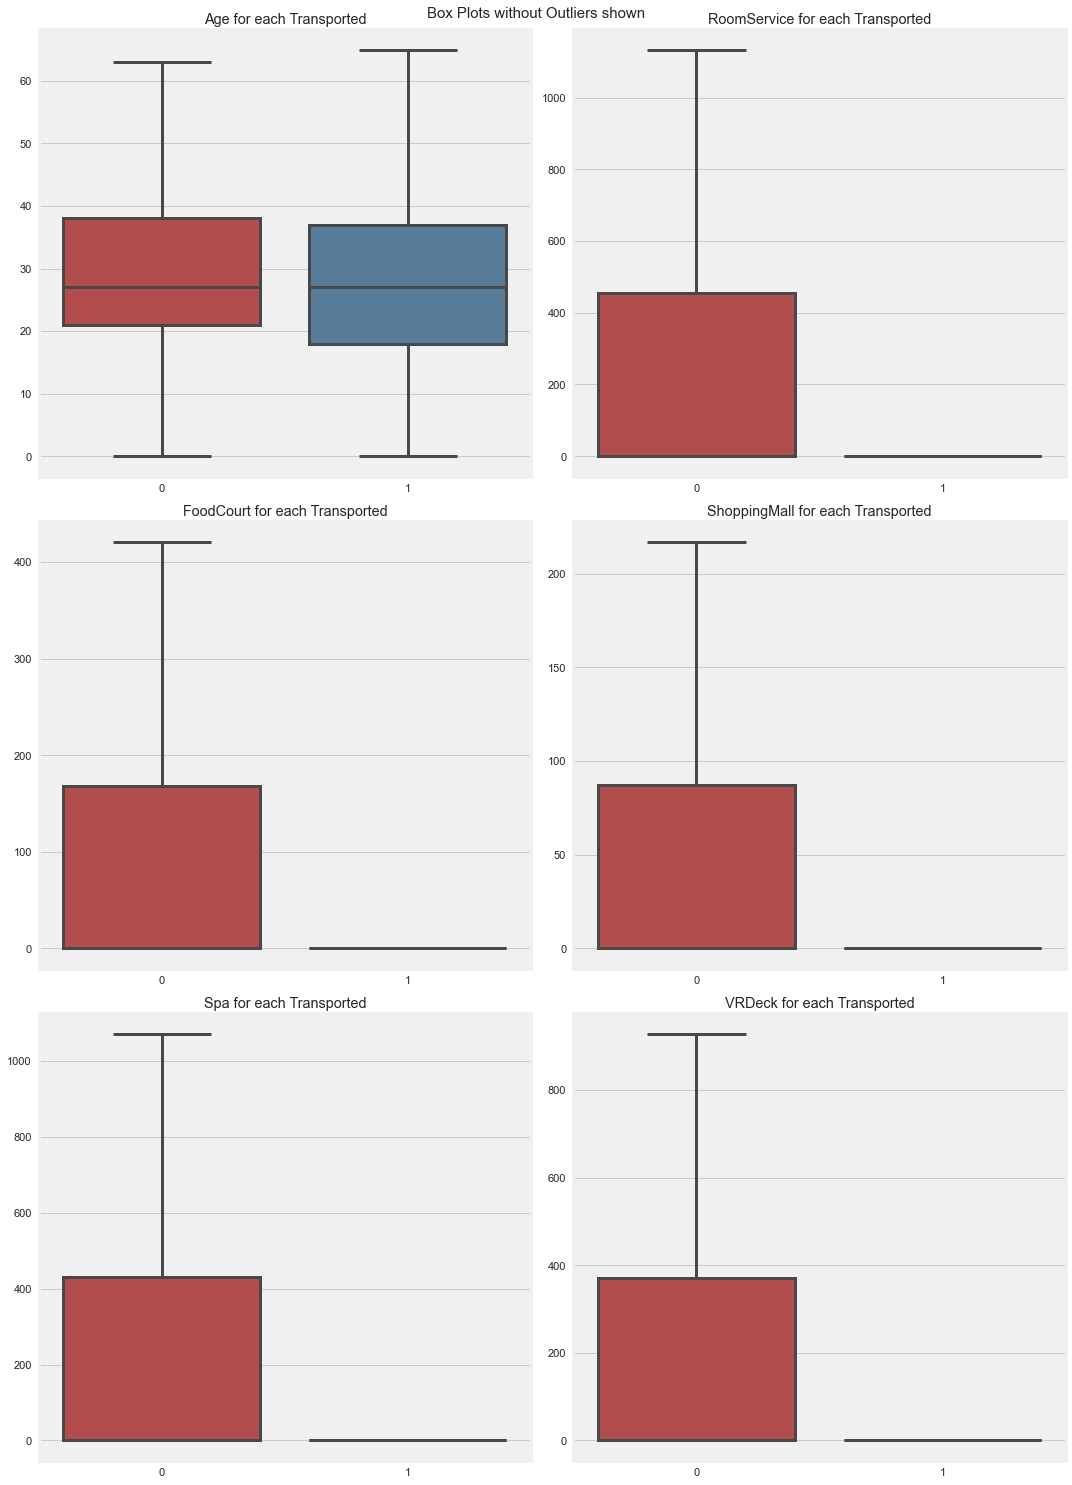

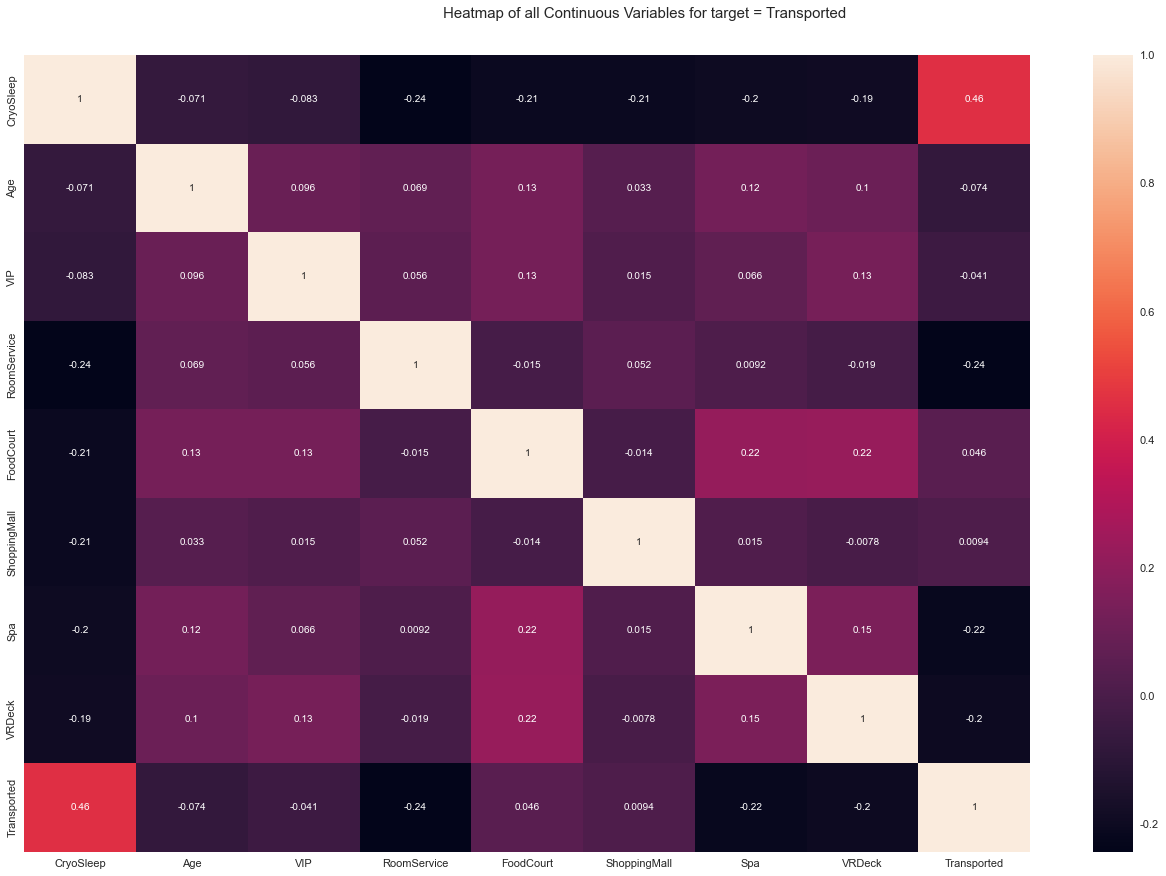

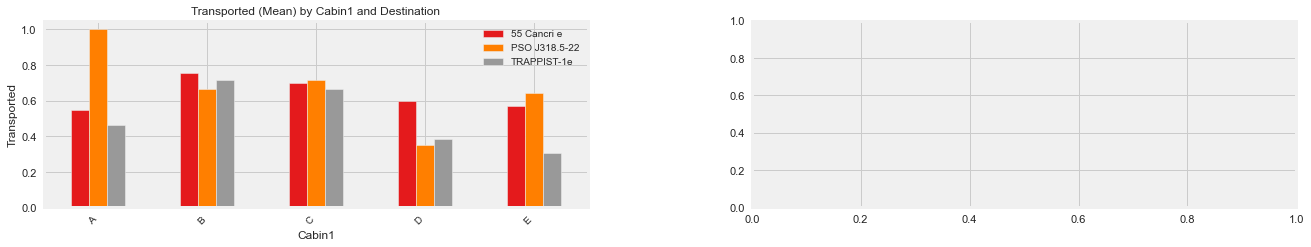

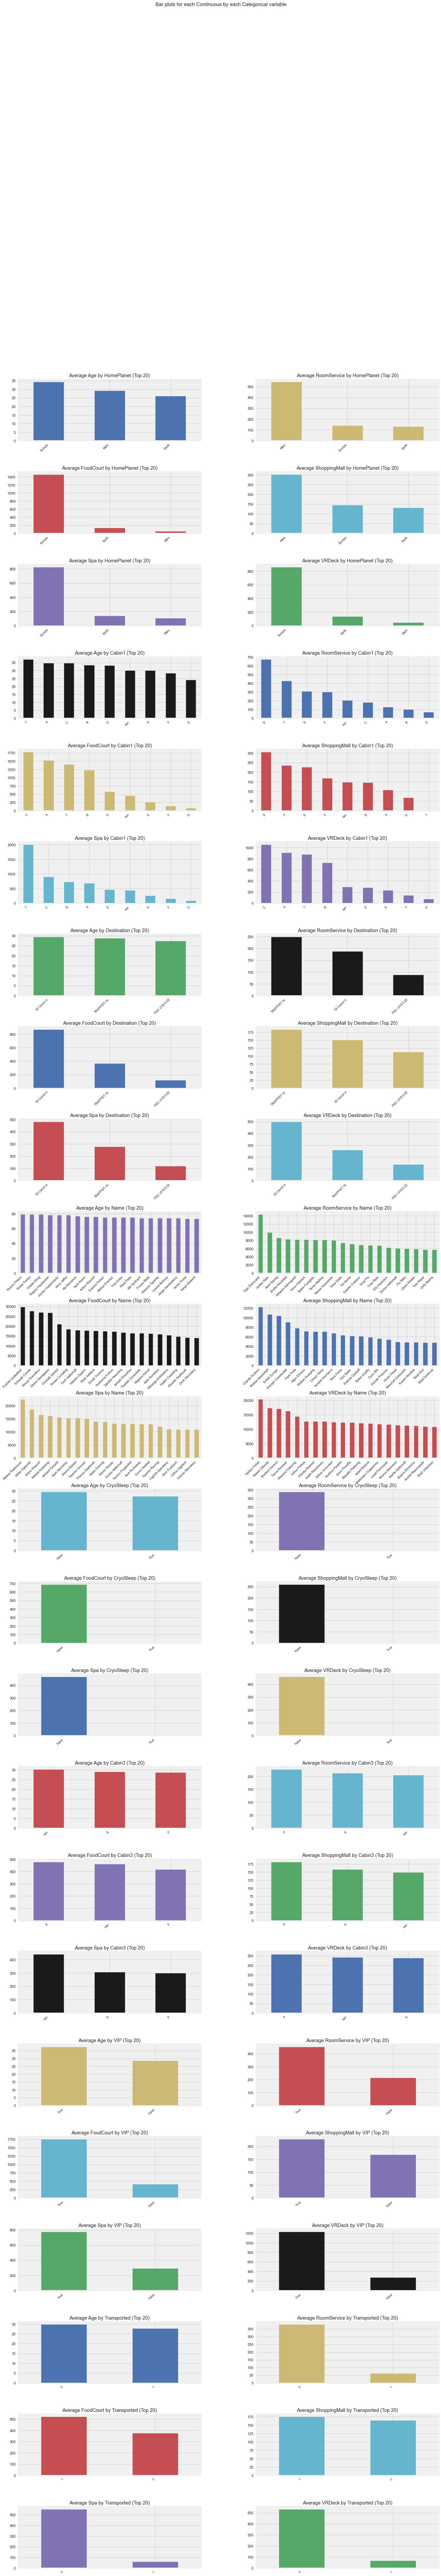

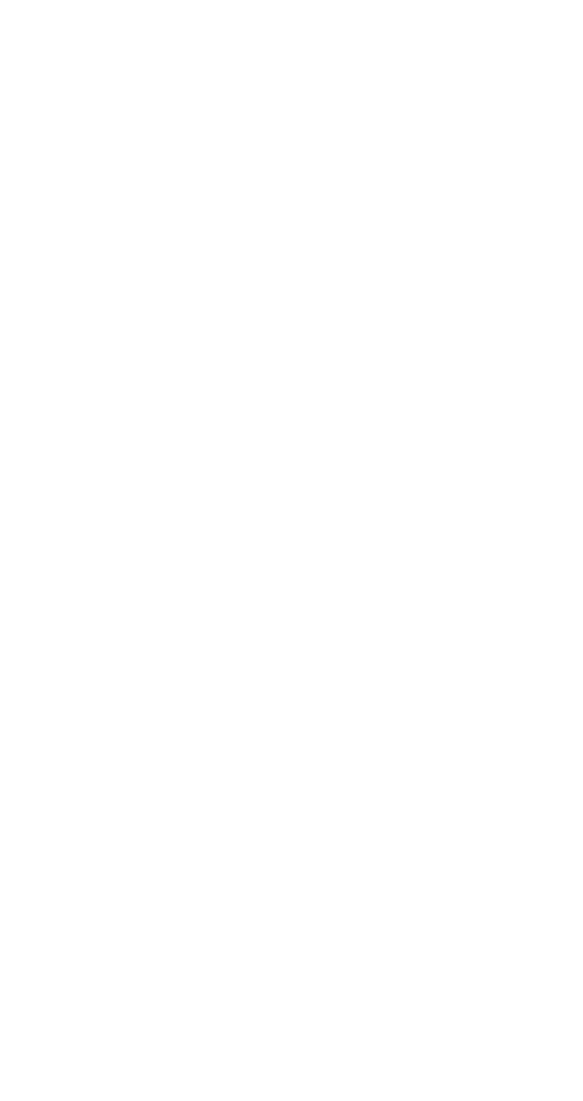

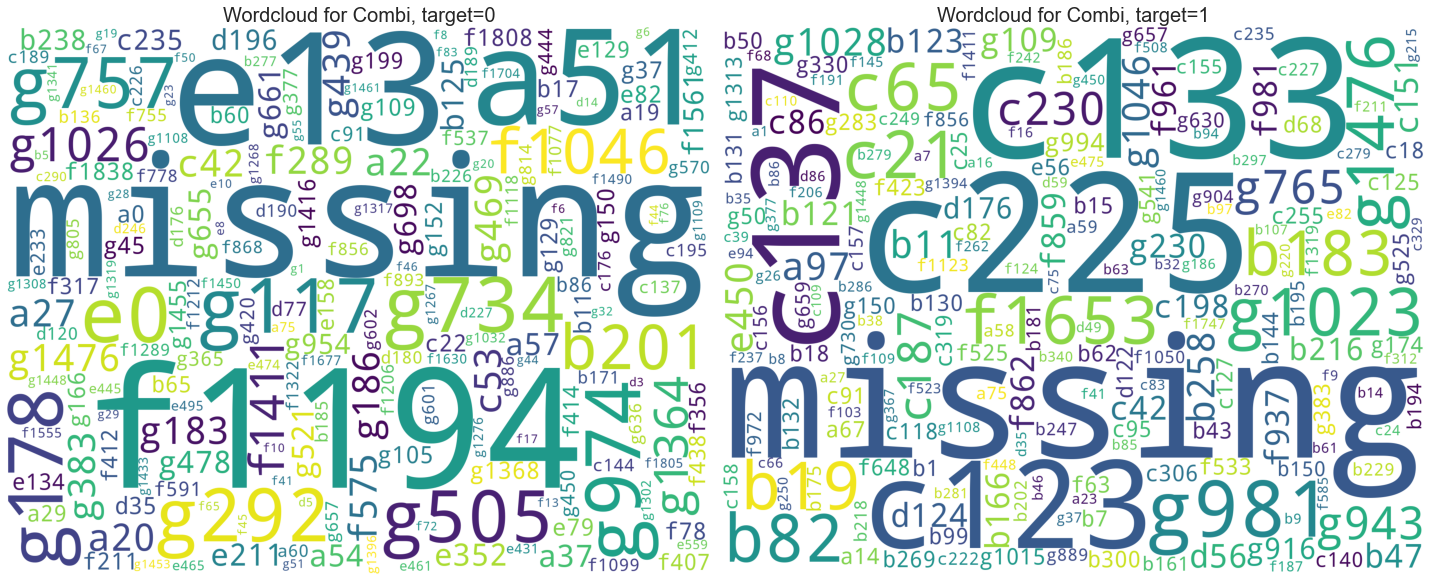

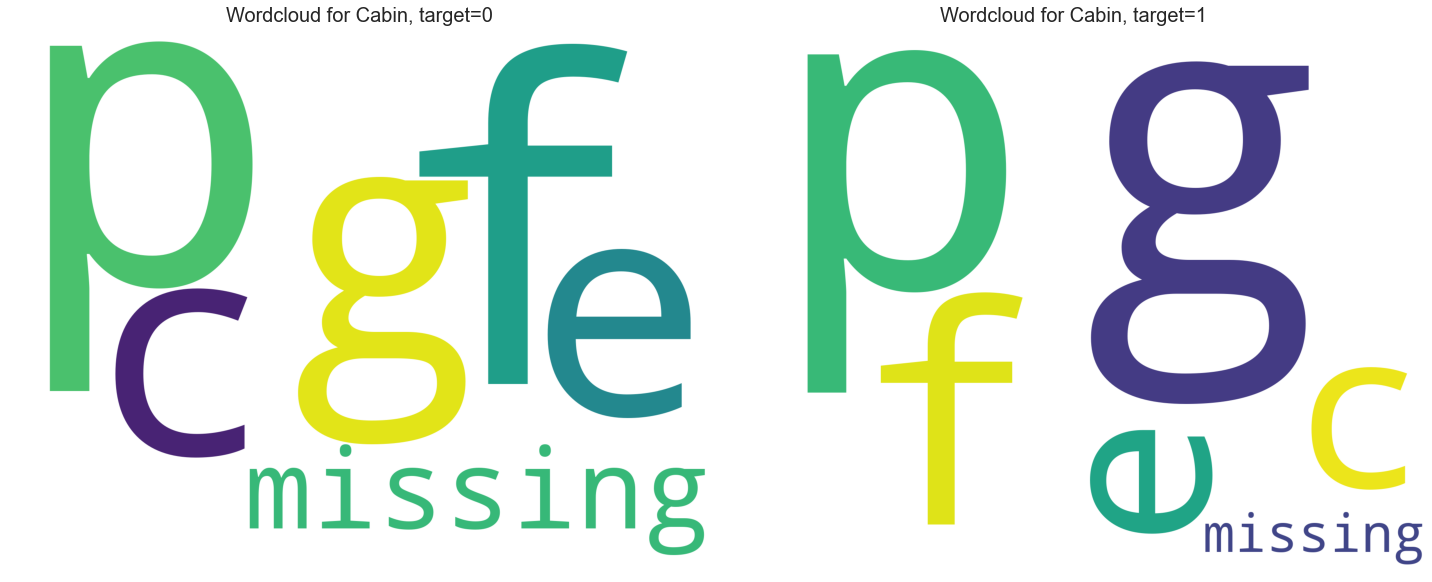

All Plots are saved in ./result\Transported
Time to run AutoViz = 18 seconds 


In [14]:
# from autoviz.AutoViz_Class import AutoViz_Class

# AutoViz 인스턴스 생성
AV = AutoViz_Class()

%matplotlib inline

# 시각화 결과 저장 경로
save_plot_dir = "./result"

# 자동 시각화 실행
dft = AV.AutoViz(
    filename="",
    sep=",",
    depVar="Transported",
    dfte=data,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=save_plot_dir
)